# Worksheet 2b: Creating future climate scenarios and analysing change

The following exercises demonstrate basic methods for analysing changes in climate, using two PRECIS experiments (driven by HadCM3Q0 and ECHAM5.) As with worksheet 2a, these are examples of some of the many analyses that can be performed using Python and Iris.

<div class="alert alert-block alert-info">
<b>Note:</b> As in Worksheet 2a, The data used here has been processed in the same way as Worksheet 1. The 8 point-rim
has been removed and it has been converted from PP to netCDF format. </div>

## Contents
### [2.8: Calculate future OND mean precipitation](#2.8) 
### [2.9: Find OND anomalies](#2.9)
### [2.10: Plot precipitation and temperature](#2.10)
### [2.11: Future time series](#2.11)

## Preamble

**a)** Run the code block below to **import** the required libraries and name key data locations. 

In [11]:
# Code preamble - these libraries will be used in this worksheet.
# This code block needs to be re-run every time you restart this worksheet!
%matplotlib inline 
import os
import iris
import iris.coord_categorisation
from iris.experimental.equalise_cubes import equalise_attributes
import iris.quickplot as qplt
import matplotlib.pyplot as plt
import numpy as np
import numpy.ma as ma

# /data/users/ssadri/pyprecis/monthly
# Some helpful data locations
DATADIR = '/project/precis/worksheets/data'
APHRODIR = os.path.join(DATADIR, 'APHRODITE')
CRUDIR = os.path.join(DATADIR, 'CRU')
CLIMDIR = os.path.join(DATADIR, 'climatology')
MODELDIR = os.path.join(DATADIR, 'netcdf')
JOBIDS = ['cahpa', 'cahpb']

<a id='2.8'></a>
## 2.8 Calculate future OND mean precipitation
**b)** First, we **calculate future OND (October, November, December) mean precipitation** for the period 2021-2051 for the HadCM3Q0-driven PRECIS simulation (cahpa) and the ECHAM5-driven simulation (cahpb):

In [2]:
for jobid in JOBIDS:
    infile = os.path.join(MODELDIR, jobid, jobid + '.pm.2021_2050.pr.norim.mmday-1.nc')
    data = iris.load_cube(infile)

    # in order to calculate OND mean, we divide the months into two seasons: 
    # one for OND and a second for the remaining months
    iris.coord_categorisation.add_season(data, 'time', name='seasons', seasons=('jfmamjjas','ond'))

    # Extract the data for the OND season only
    data_ond = data.extract(iris.Constraint(seasons='ond'))

    # Now calculate the mean over the OND season
    future_ond_mean = data_ond.aggregated_by(['seasons'], iris.analysis.MEAN)

    # save the OND mean as a netCDF
    outfile = os.path.join(CLIMDIR, jobid + '.OND.mean.future.pr.mmday-1.nc')
    iris.save(future_ond_mean, outfile)

PermissionError: [Errno 13] Permission denied: b'/project/precis/worksheets/data/climatology/cahpa.OND.mean.future.pr.mmday-1.nc'

<div class="alert alert-block alert-success">
<b>Question:</b> Which line of code is used to execute the code for both simulations (capha and cahpb)? 
</div>

<b>Answer</b><br>
    *Type your anser here...*

Within the loop, we have created two cubes. This is the future seasonal OND constrained cube:

In [3]:
data_ond

<iris 'Cube' of precipitation_flux / (mm day-1) (time: 90; grid_latitude: 192; grid_longitude: 192)>

 And this is the seasonal OND mean cube, averaged over the future period 2021-2050:

In [4]:
future_ond_mean

<iris 'Cube' of precipitation_flux / (mm day-1) (time: 1; grid_latitude: 192; grid_longitude: 192)>

Remember that the loop has created and saved two cubes, one for each jobid.

<a id='2.9'></a>
## 2.9 Find OND anomalies
**b)** Next, we **subtract the baseline (1961-1990) mean from the future (2021-2050) mean** for OND to get the change in precipitation (or **anomly**) from both simulations.  The changes are also converted to percentages:

In [5]:
for jobid in JOBIDS:
    # Load the baseline cube
    infile = os.path.join(CLIMDIR, jobid + '.a.OND.mean.baseline.pr.mmday-1.nc')
    OND_baseline = iris.load_cube(infile)
    # Set the correct units
    OND_baseline.units = "mm day-1"
    # Load the future cube
    infile = os.path.join(CLIMDIR, jobid + '.a.OND.mean.future.pr.mmday-1.nc')
    OND_future = iris.load_cube(infile)
    # Subtract the baseline cube from the future cube
    diff = iris.analysis.maths.subtract(OND_future, OND_baseline)
    # Save the resulting cube
    outfile = os.path.join(CLIMDIR, jobid + '.a.OND.mean.diff.pr.mmday-1.nc')
    iris.save(diff, outfile)
    # Find the percentage change
    pcent_change = iris.analysis.maths.multiply(iris.analysis.maths.divide(diff, OND_baseline), 100)
    # And save this too
    outfile = os.path.join(CLIMDIR, jobid + '.OND.mean.diffperc.pr.mmday-1.nc')
    iris.save(pcent_change, outfile)

OSError: One or more of the files specified did not exist:
    * "/project/precis/worksheets/data/climatology/cahpa.a.OND.mean.future.pr.mmday-1.nc" didn't match any files

**c)** Now, repeat the calculations yourself for **temperature**. First, we calculate the **OND mean** temperatures.

**Fill in the missing commands in the code block below**:

In [12]:
time_periods = {'baseline':'1981_1983', 'future':'2021_2050'}

for jobid in JOBIDS:
    for period in time_periods.keys():
        # Load the data:
        infile = os.path.join(MODELDIR, jobid, jobid + '.pm.' + time_periods[period] + '.tm.norim.K.nc')
        data = iris.load_cube(infile)
        
        # In order to calculate OND mean, add a season coordinate, seperating OND from the other months:  
        

        # Extract the data for the OND season only:

        
        # Now calculate the mean over the OND season:
        
        
        # Convert the units from Kelvin to Celsius:

        
        outfile = os.path.join(CLIMDIR, jobid + '.OND.mean.' + period + '.tm.C.nc')
        # save the OND mean as a netCDF ('outfile' specifies the output file name for your OND mean cube):

        

**d)** Next, we **calculate the difference** between the baseline and future periods.

In [14]:
for jobid in JOBIDS:
    # Load files:
    baselinefile = os.path.join(CLIMDIR, jobid + '.a.OND.mean.baseline.tm.C.nc')
    futurefile = os.path.join(CLIMDIR, jobid + '.a.OND.mean.future.tm.C.nc')
    OND_baseline = iris.load_cube(baselinefile)
    OND_future = iris.load_cube(futurefile)
    
    # Calculate 'future mean' minus 'baseline mean':
    diff = iris.analysis.maths.subtract(OND_future, OND_baseline)
    
    # Save
    outfile = os.path.join(CLIMDIR, jobid + '.OND.mean.diff.tm.C.nc')
    iris.save(diff, outfile)

OSError: One or more of the files specified did not exist:
    * "/project/precis/worksheets/data/climatology/cahpa.a.OND.mean.baseline.tm.C.nc" didn't match any files

<a id='2.10'></a>
## 2.10 Plot precipitation and temperature

**e)** **Plot changes** to precipitation (in %) and temperature (in deg.C)

/opt/scitools/environments/experimental/2018_10_16-1/lib/python3.6/site-packages/iris/coords.py:1138: UserWarning: Coordinate 'grid_longitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))
/opt/scitools/environments/experimental/2018_10_16-1/lib/python3.6/site-packages/iris/coords.py:1138: UserWarning: Coordinate 'grid_latitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))
/opt/scitools/environments/experimental/2018_10_16-1/lib/python3.6/site-packages/iris/coords.py:1138: UserWarning: Coordinate 'grid_longitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))
/opt/scitools/environments/experimental/2018_10_16-1/lib/python3.6/site-packages/iris/coords.py:1138: UserWarning: Coordinate 'grid_latitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))


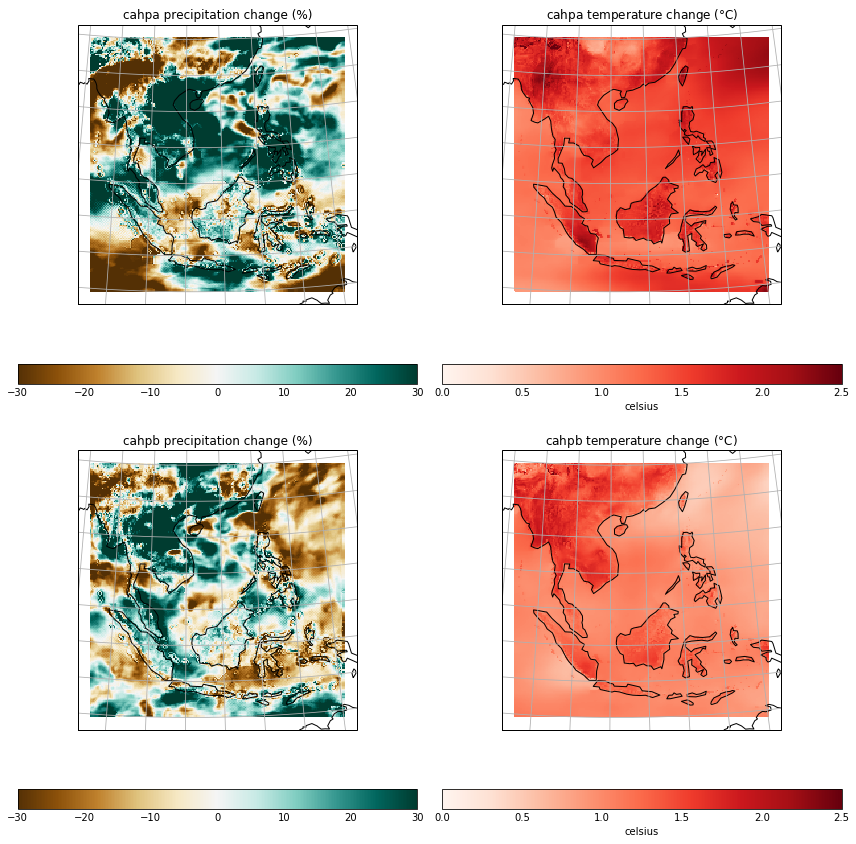

In [8]:
# Create a figure of the size 12x12 inches
plt.figure(figsize=(12, 12))

# Read in the percentage changes in precipitation
for n, jobid in enumerate(JOBIDS):
    prpath = os.path.join(CLIMDIR, jobid + '.OND.mean.diffperc.pr.mmday-1.nc')
    tmpath = os.path.join(CLIMDIR, jobid + '.OND.mean.diff.tm.C.nc')
    pcent_change = iris.load_cube(prpath)
    degc_change = iris.load_cube(tmpath)

    # Remove extra time dimension
    pcent_change = iris.util.squeeze(pcent_change)
    degc_change = iris.util.squeeze(degc_change)
    
    plot_num = n*2 + 1
    plt.subplot(2, 2, plot_num) # Create a new subplot with 2 rows, 2 columns, 1st plot
    qplt.pcolormesh(pcent_change, vmax=30, vmin=-30, cmap='BrBG')
    plt.title(jobid + ' precipitation change (%)')
    ax = plt.gca()              # gca function that returns the current axes
    ax.coastlines()             # adds coastlines defined by the axes of the plot
    ax.gridlines()              # adds x and y grid lines to the plot

    plt.subplot(2, 2, plot_num+1)
    qplt.pcolormesh(degc_change, vmax=2.5, vmin=0, cmap='Reds')
    plt.title(jobid + ' temperature change ($\degree$C)')
    ax = plt.gca()
    ax.coastlines()
    ax.gridlines()

plt.tight_layout()          # automatically adjusts subplot(s) to fit in to the figure area
plt.show()

<div class="alert alert-block alert-success">
<b>Question:</b> How would you use a discrete countoured colour map to show changes in precipitation and temperature? <br>
    Modify the code above to use <strong>qplt.pconourf()</strong>.  Remember to choose appropriate contours.
</div>

<div class="alert alert-block alert-success">
<b>Question:</b>  The plots show projected changes in precipitation and temperature using two models; what are the common features between the two model projections? 
    
What differences exist between the two model projections? Which is hotter, wetter, how does the spatial distribution differ? 
    
</div>

<b>Answer:</b><br>
*Type your answers here...*

<a id='2.11'></a>
## 2.11 Future time series

**f)** Calculate and then plot a 2021-2050 monthly **time series of precipitation anomalies** for land
points only, relative to the 1961-1990 baseline monthly mean. Do this for both cahpa and cahpb.


In [9]:
# Read in the land-sea mask. 
# The cube data array has a mask associated with it which we'll use to mask out ocean points.
land_sea_mask = iris.load_cube(DATADIR + '/landmask.nc')

for jobid in JOBIDS:
    # Read in original data for baseline and future
    baselinepath = os.path.join(MODELDIR, jobid, jobid + '.pm.1981_1983.pr.norim.mmday-1.nc')
    futurepath = os.path.join(MODELDIR, jobid, jobid + '.pm.2021_2050.pr.norim.mmday-1.nc')
    baseline = iris.load_cube(baselinepath)
    future = iris.load_cube(futurepath)
    

    # Apply land mask. Probably not most efficient method. baseline / future data arrays are changed to masked type
    baseline.data = ma.array(baseline.data, mask=baseline.data*land_sea_mask.data.mask[np.newaxis, :,:])
    future.data = ma.array(future.data, mask=future.data*land_sea_mask.data.mask[np.newaxis, :,:])

    # Calculate mean values over land points
    baseline_land = baseline.collapsed(['grid_longitude', 'grid_latitude'], iris.analysis.MEAN)
    future_land = future.collapsed(['grid_longitude', 'grid_latitude'], iris.analysis.MEAN)

    # Save future & baseline area averaged monthly data (time series)
    baselineout = os.path.join(CLIMDIR, jobid + '.pm.baseline.series.pr.mmday-1.nc')
    futureout = os.path.join(CLIMDIR, jobid + '.pm.future.series.pr.mmday-1.nc')
    iris.save(baseline_land, baselineout)
    iris.save(future_land, futureout)

    # Subtract baseline from future
    diff = future_land.copy()
    diff.data = future_land.data - baseline_land.data.mean()

    # Save the area averaged monthly differences (time series)
    outpath = os.path.join(CLIMDIR, jobid + '.pm.diff.series.pr.mmday-1.nc')
    iris.save(diff, outpath)

/opt/scitools/environments/experimental/2018_10_16-1/lib/python3.6/site-packages/iris/cube.py:3180: UserWarning: Collapsing spatial coordinate 'grid_latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/opt/scitools/environments/experimental/2018_10_16-1/lib/python3.6/site-packages/iris/coords.py:1355: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'grid_latitude'.
  warnings.warn(msg.format(self.name()))
/opt/scitools/environments/experimental/2018_10_16-1/lib/python3.6/site-packages/iris/coords.py:1355: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'grid_longitude'.
  warnings.warn(msg.format(self.name()))


PermissionError: [Errno 13] Permission denied: b'/project/precis/worksheets/data/climatology/cahpa.pm.baseline.series.pr.mmday-1.nc'

**g)** **Plot the precipitation anomalies** of cahpa and cahpb

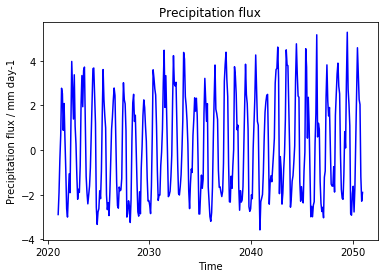

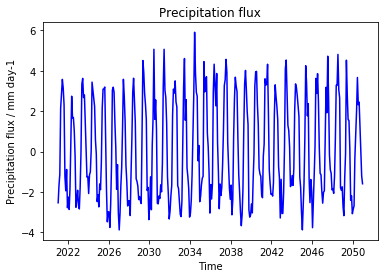

In [15]:
# Read in the monthly series
cahpa = iris.load_cube(CLIMDIR + '/cahpa.pm.diff.series.pr.mmday-1.nc')
cahpb = iris.load_cube(CLIMDIR + '/cahpb.pm.diff.series.pr.mmday-1.nc')

# Plot the two model time series' on the same figure
cahpa_plot = qplt.plot(cahpa,color = 'blue' ,  label = 'cahpa')
qplt.show()
cahpb_plot = qplt.plot(cahpb, color = 'blue',  label = 'cahpb')
qplt.show()